# Module 3: The Matrix

How are your neighbors effecting you?
****

The Threshold filter from Module 2 modified the image by changing pixel value depending on if it was above or below a fixed value.  Each discrete pixel was modified in insolation.  Another way to modify an image would be to change the pixel value in relation to the neighboring pixels.  To accomplish this we use a matrix of numbers called a **Convolution Kernel**.  

**Sharpen** and **Blur** are two common kernels.

**3x3 Sharpen Kernel:**

$$\begin{bmatrix} 1 & 2 & 1 \\ 3 & 0 & 1 \\ 0 & 2 & 4 \end{bmatrix}$$ 


**3x3 Blur Kernel:**

$$\begin{bmatrix} 1/9 & 1/9 & 1/9 \\ 1/9 & 1/9 & 1/9 \\ 1/9 & 1/9 & 1/9 \end{bmatrix}$$

The kernel is placed over the image and centered on the middle pixel.  The middle value plus the neighboring values are multipled by the corresponding kernel valuse and then summed up to set the pixel value.  Below is the process for a 3x3 Blur kernel applied to a 3x3 section of a black and white image. <p>

$$
\begin{bmatrix}
1/9 & 1/9 & 1/9\\
1/9 & 1/9 & 1/9\\
1/9 & 1/9 & 1/9
\end{bmatrix} X
\begin{bmatrix}
255 & 226 & 153\\ 
226 & 153 & 0\\
153 & 0 & 0
\end{bmatrix}
$$

(255 * 1/9) + (226 * 1/9) + (153 * 1/9) + <br>
(226* 1/9) + (153 * 1/9) + (0 * 1/9) + <br>
(153 * 1/9) + (0 * 1/9) + (0 * 1/9) = 129.426 ≈ 129

Remember we can only have whole number (integer) values so round it to 129. 

To find the values for a the whole image repeat this for every pixel in the image.  You might realize that there is aproblem when you hit the edges of the image.  You are missing  pixel values to multiply with your kernel.  To simpify this example we are going to skip over dealing with the edge pixels.


(Matrix operation.  List of filters.  Walk through coding examples.)

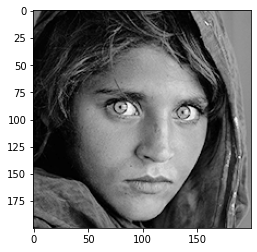

In [99]:
#Install Open CV and give tutorial on getting Jupyter notebook up and running.
# %pip install opencv-contrib-python
# %pip install matplotlib

#Import Libraries
import cv2
import numpy as np
import copy
import matplotlib.pyplot as plt

#Saving and displaying an image
img = cv2.imread('Graphics/face_conv.png')

#Save the height and width
h = img.shape[0]
w = img.shape[1]

#OpenCV by defualt uses BGR instead of RGB.  First convert the color values to greyscale using the OpenCV implementation.  Then convert from BGR to RGB to draw to the screen.
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#cv2.imshow('Face',img)
#Use matplotlib while using a python notebook
plt.imshow(img)


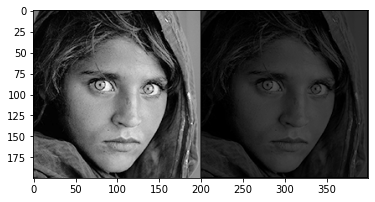

In [141]:
#Let's turn the black pixels red to show there location

#Let's copy our image to perfrom the convolution.
imgConv = np.zeros((200,200,3), dtype=np.uint8)

# Kernel to perform convulotion
kernel = np.array(([.111,.111,.111],[.111,.111,.111],[.111,.111,.111]), dtype=np.float32)
# kernel = np.array(([-1,-1,-1],[-1,3,-1],[-1,-1,-1]), dtype=np.float32)


#For each row in our grid.  Skip the first and last row
for y in range(1,h-1):
    #Search each pixel in the row. Skip the left and right columns.
    for x in range(1,w-1):
        # Create a value for the sum of the convolution
        sum = 0
        # Search the pixels all around. Start one pixel to the left and above.
        ky = -1
        kx = -1
        # For each row in the 3x3 matrix
        for ky in range(ky,1):
            # For each pixel in the row
            for kx in range(kx,1):
                
                # Add to the kernel * the pixel value. This is wrong
                sum += kernel[ky,kx] * img[x,y,0]

                #Increase the brightness so you can see the blur better.
                # sum = sum*1.4
        
        #Set the new gray value for the pixel
        imgConv[x,y] = sum 

#Combine the greyscale and the convulved image along the so they can be displayed at the same time.  axis=0 for vertical axis=1 for horizontal alignment.
imgTwo = np.concatenate((img, imgConv), axis=1)

#Use matplotlib while using a python notebook. Draw the image.
plt.imshow(imgTwo)

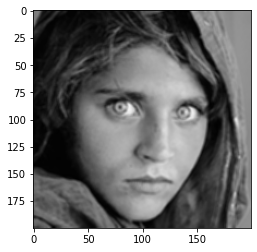

In [142]:
imgConv2 = cv2.filter2D(img,-1,kernel)
plt.imshow(imgConv2)